In [465]:
# For importing the UCI dataset
!pip install ucimlrepo

In [72]:
# Importing necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns

In [73]:
 # fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes) 
X = adult.data.features 
Y = adult.data.targets

In [74]:
# metadata 
print(adult.metadata)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [75]:
# variable information 
print(adult.variables)

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

In [76]:
print(X)

       age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2              

In [77]:
print(Y)

       income
0       <=50K
1       <=50K
2       <=50K
3       <=50K
4       <=50K
...       ...
48837  <=50K.
48838  <=50K.
48839  <=50K.
48840  <=50K.
48841   >50K.

[48842 rows x 1 columns]


In [78]:
# Combine it into a dataframe

df = pd.DataFrame(data=X, columns=adult.data.feature_names)
df['income'] = Y

In [79]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [80]:
# Information about the cell types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Find the missing values denoted as "?"

In [81]:
for i in df.columns:
    print("Column : ", i, ", Missing Values : ", df.loc[df[i] == "?", i].size)

df['income'].value_counts()

Column :  age , Missing Values :  0
Column :  workclass , Missing Values :  1836
Column :  fnlwgt , Missing Values :  0
Column :  education , Missing Values :  0
Column :  education-num , Missing Values :  0
Column :  marital-status , Missing Values :  0
Column :  occupation , Missing Values :  1843
Column :  relationship , Missing Values :  0
Column :  race , Missing Values :  0
Column :  sex , Missing Values :  0
Column :  capital-gain , Missing Values :  0
Column :  capital-loss , Missing Values :  0
Column :  hours-per-week , Missing Values :  0
Column :  native-country , Missing Values :  583
Column :  income , Missing Values :  0


income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

We can see that income column has unclean data such as '<=50K.' which should be '<=50K'

In [82]:
df.replace({'income':{">50K.":">50K" , "<=50K.":"<=50K"}},inplace=True)

In [83]:
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

<Axes: xlabel='income', ylabel='count'>

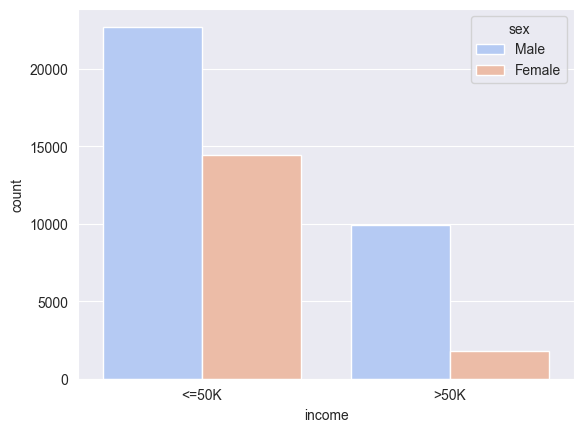

In [84]:
sns.countplot(x='income', data=df, hue='sex', palette='coolwarm')

<Figure size 1000x600 with 0 Axes>

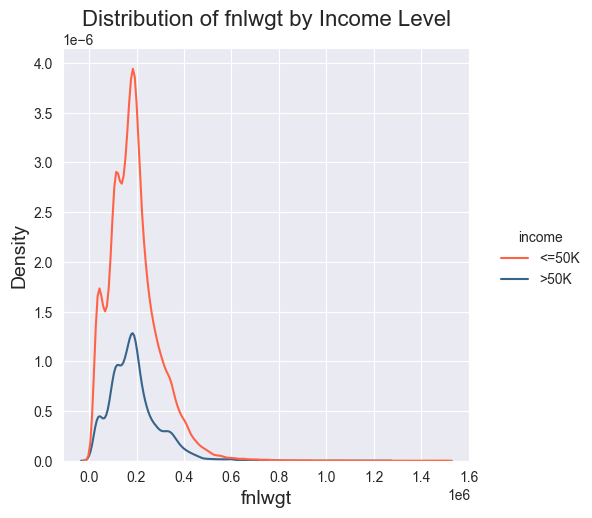

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set contrasting color palette
contrasting_colors = ["#FF6347", "#36648B"]  # Choose your desired colors

plt.figure(figsize=(10, 6))
sns.displot(x='fnlwgt', data=df, hue='income', kind='kde', palette=contrasting_colors)
plt.title('Distribution of fnlwgt by Income Level', fontsize=16)
plt.xlabel('fnlwgt', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

In [86]:
Education_data=df['education'].value_counts()
order1= list(Education_data.index)

EducationNum_data=df['education-num'].value_counts()
order2= list(EducationNum_data.index)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23580\2582556869.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1= sns.countplot(data=df, x='education', order=order1, palette ='coolwarm')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23580\2582556869.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot2= sns.countplot(data=df, x='education-num', order=order2, palette = 'coolwarm')


Text(0.5, 1.0, 'Count by Education')

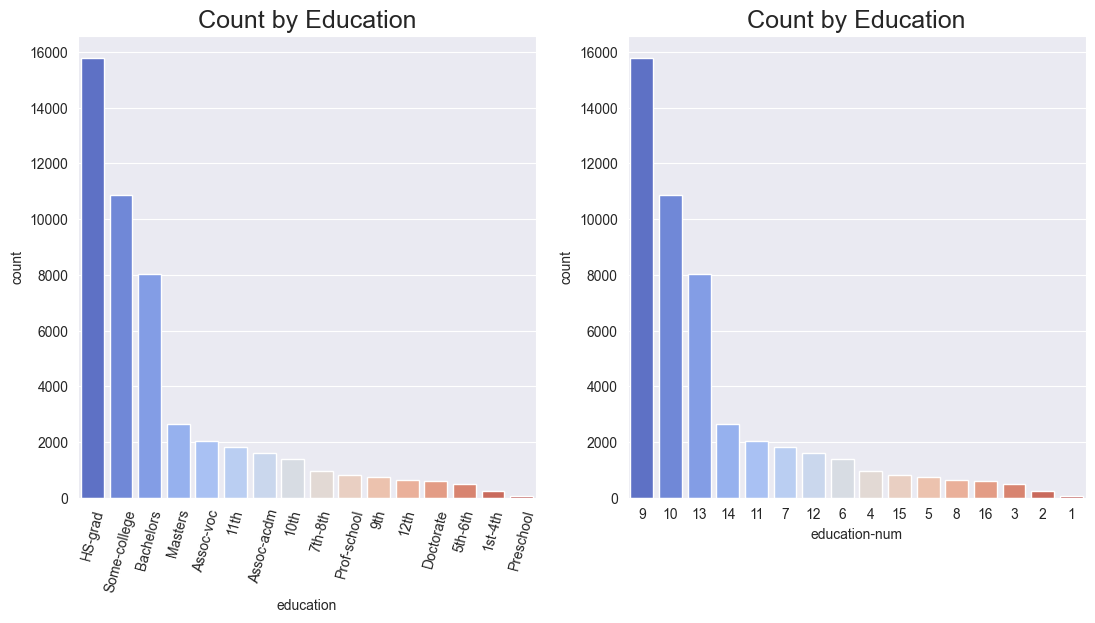

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,6))

# Plot the count bar plot
plt.subplot(1,2,1)
plot1= sns.countplot(data=df, x='education', order=order1, palette ='coolwarm')
plt.title('Count by Education', fontsize=18)
plt.xticks(rotation=75)

plt.subplot(1,2,2)
plot2= sns.countplot(data=df, x='education-num', order=order2, palette = 'coolwarm')
plt.title('Count by Education', fontsize=18)

Education and Education-num columns are correlated

In [88]:
df.drop('education', axis=1, inplace=True)

In [89]:
df['capital-gain'].value_counts()

capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
22040        1
2387         1
1639         1
1111         1
6612         1
Name: count, Length: 123, dtype: int64

In [90]:
df['capital-loss'].value_counts()

capital-loss
0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
1870        1
1911        1
2465        1
1421        1
Name: count, Length: 99, dtype: int64

Both capital gain and capital loss hava value 0 for more than 90%

In [91]:
df.drop('capital-loss', axis=1, inplace=True)

In [92]:
df.drop('capital-gain', axis=1, inplace=True)

In [93]:
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

The column native-country has more than 95% entries from the United States. Therefore, it is unnecessary for the model

In [94]:
df.drop('native-country', axis=1, inplace=True)

In [95]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

1836 values are missing in 'workclass'

In [96]:
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

1843 values are missing in 'occupation'

Where occupation is missing, workclass is missing too

In [97]:
temp_df = df.loc[((df["occupation"] == "?") & (df["workclass"] == "?")), :]
len(temp_df)

1836

The columns 'workclass', 'occupation' and 'native-country' only has missing values

In [98]:
df_clean = df[df['workclass'] != "?"]
df_clean.head(100)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
99,32,Federal-gov,249409,9,Never-married,Other-service,Own-child,Black,Male,40,<=50K
100,76,Private,124191,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,>50K
101,44,Private,198282,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,60,>50K
102,47,Self-emp-not-inc,149116,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,<=50K


In [99]:
df_clean['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [100]:
df_clean = df[df['occupation'] != "?"]
df_clean['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [101]:
# Check for missing values in the dataset
if df_clean.isnull().values.any():
    print("There are missing values in the dataset")
else:
    print("No missing values in the dataset")

There are missing values in the dataset


In [102]:
# Missing values
df_clean.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

In [103]:
df_clean.head(100)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
99,32,Federal-gov,249409,9,Never-married,Other-service,Own-child,Black,Male,40,<=50K
100,76,Private,124191,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,>50K
101,44,Private,198282,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,60,>50K
102,47,Self-emp-not-inc,149116,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,<=50K


In [104]:
df_clean['workclass'].isnull().sum()

963

In [105]:
df_clean.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

In [106]:
df_clean.dropna(inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23580\3672730446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.dropna(inplace=True)


In [107]:
if df_clean.isnull().values.any():
    print("There are missing values in the dataset")
else:
    print("No missing values in the dataset")

No missing values in the dataset


In [108]:
df_clean.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K


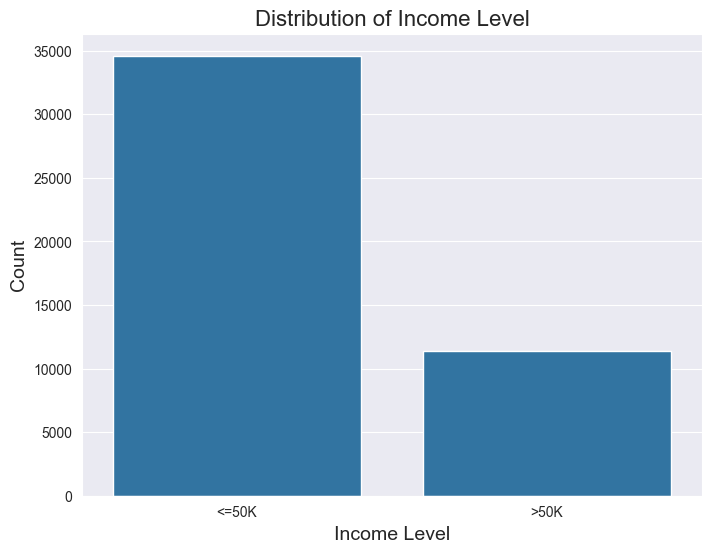

In [109]:
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=df_clean)
plt.title('Distribution of Income Level', fontsize=16)
plt.xlabel('Income Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23580\632439946.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[col])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23580\632439946.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[col])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2

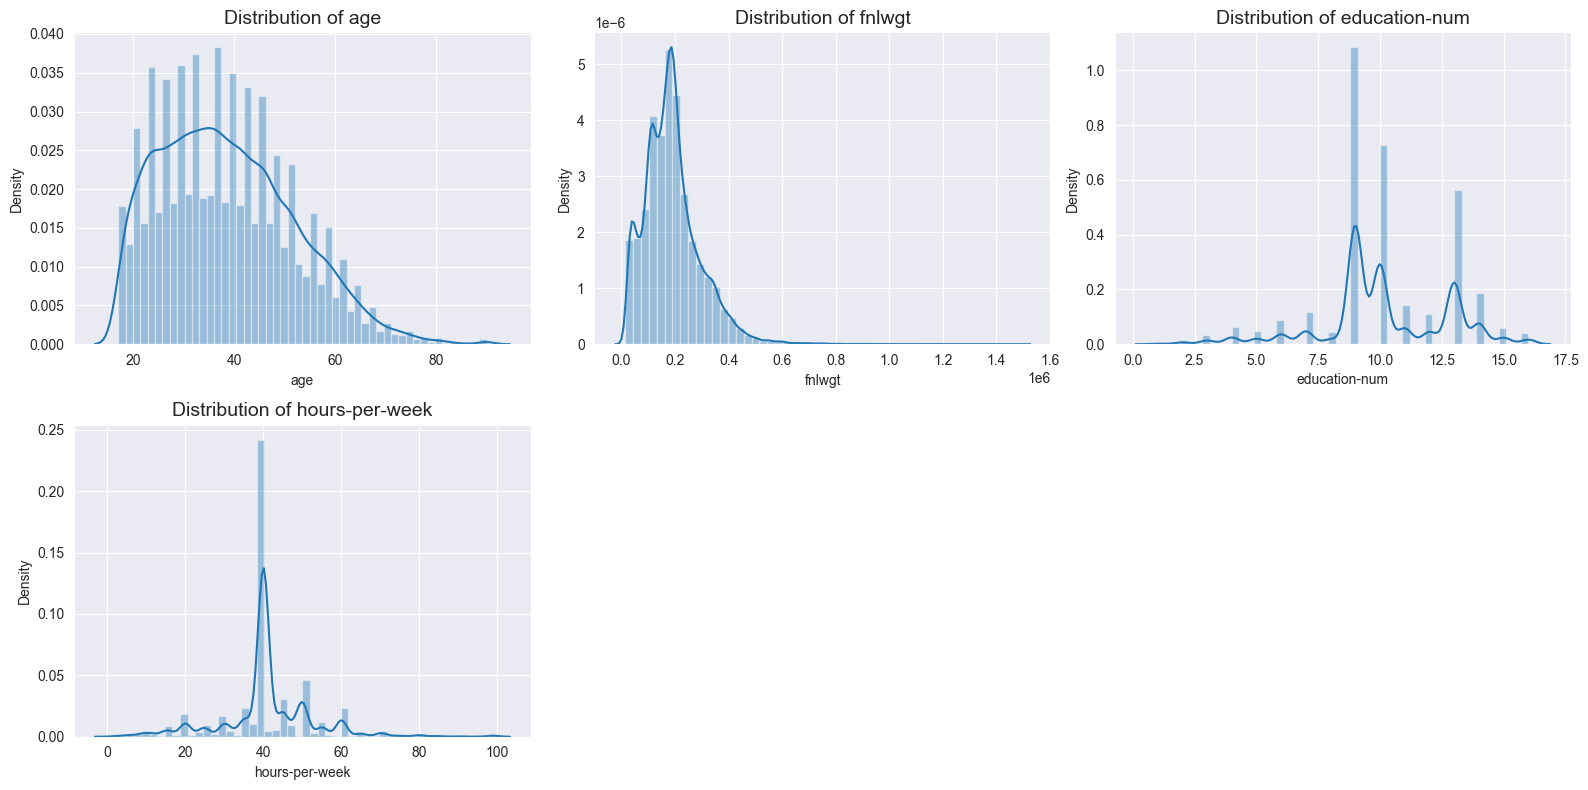

In [110]:
# Visualize the distribution of numeric features
plt.figure(figsize=(16, 8))
for i, col in enumerate(df_clean.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(2, 3, i+1)
    sns.distplot(df_clean[col])
    plt.title(f'Distribution of {col}', fontsize=14)
plt.tight_layout()
plt.show()

In [111]:
label_encoder = LabelEncoder()
df_clean['income'] = label_encoder.fit_transform(df_clean['income'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23580\3588909158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['income'] = label_encoder.fit_transform(df_clean['income'])


In [112]:
# Fill missing numerical values with the mean
imputer = SimpleImputer(strategy='mean')
df_clean[['age', 'income', 'fnlwgt', 'education-num', 'hours-per-week']] = imputer.fit_transform(df_clean[['age', 'income', 'fnlwgt', 'education-num', 'hours-per-week']])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23580\2401718404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['age', 'income', 'fnlwgt', 'education-num', 'hours-per-week']] = imputer.fit_transform(df_clean[['age', 'income', 'fnlwgt', 'education-num', 'hours-per-week']])


In [113]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46033 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46033 non-null  float64
 1   workclass       46033 non-null  object 
 2   fnlwgt          46033 non-null  float64
 3   education-num   46033 non-null  float64
 4   marital-status  46033 non-null  object 
 5   occupation      46033 non-null  object 
 6   relationship    46033 non-null  object 
 7   race            46033 non-null  object 
 8   sex             46033 non-null  object 
 9   hours-per-week  46033 non-null  float64
 10  income          46033 non-null  float64
dtypes: float64(5), object(6)
memory usage: 4.2+ MB


In [114]:
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
labEnc = LabelEncoder()
for col in categorical_cols:
  df_clean[col] = labEnc.fit_transform(df_clean[col])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23580\1427612544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = labEnc.fit_transform(df_clean[col])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23580\1427612544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = labEnc.fit_transform(df_clean[col])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23580\1427612544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Validate Data

Replace missing values with the mode of the column

In [115]:
# check for missing values in the dataset
if df_clean.isnull().values.any():
    print("There are missing values in the dataset.")
else:
    print("No missing values in the dataset.")

No missing values in the dataset.


In [116]:
df_clean.describe()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
count,46033.000000,46033.000000,4.603300e+04,46033.000000,46033.000000,46033.000000,46033.000000,46033.000000,46033.000000,46033.000000,46033.000000
mean,38.556601,2.205201,1.898051e+05,10.128929,2.587796,5.979080,1.411965,3.672061,0.675906,40.948407,0.248126
std,13.204268,0.957854,1.054747e+05,2.564064,1.497996,4.023434,1.597293,0.841747,0.468040,12.011069,0.431930
min,17.000000,0.000000,1.349200e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.000000,1.176060e+05,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,40.000000,0.000000
50%,37.000000,2.000000,1.783530e+05,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,40.000000,0.000000
75%,47.000000,2.000000,2.378650e+05,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,45.000000,0.000000
max,90.000000,6.000000,1.490400e+06,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99.000000,1.000000


Drop duplicated values

In [117]:
df_clean.duplicated().sum()

61

In [118]:
df_clean.drop_duplicates(inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23580\291987672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop_duplicates(inplace=True)


In [119]:
df_clean.duplicated().sum()

0

## Correlation Matrix

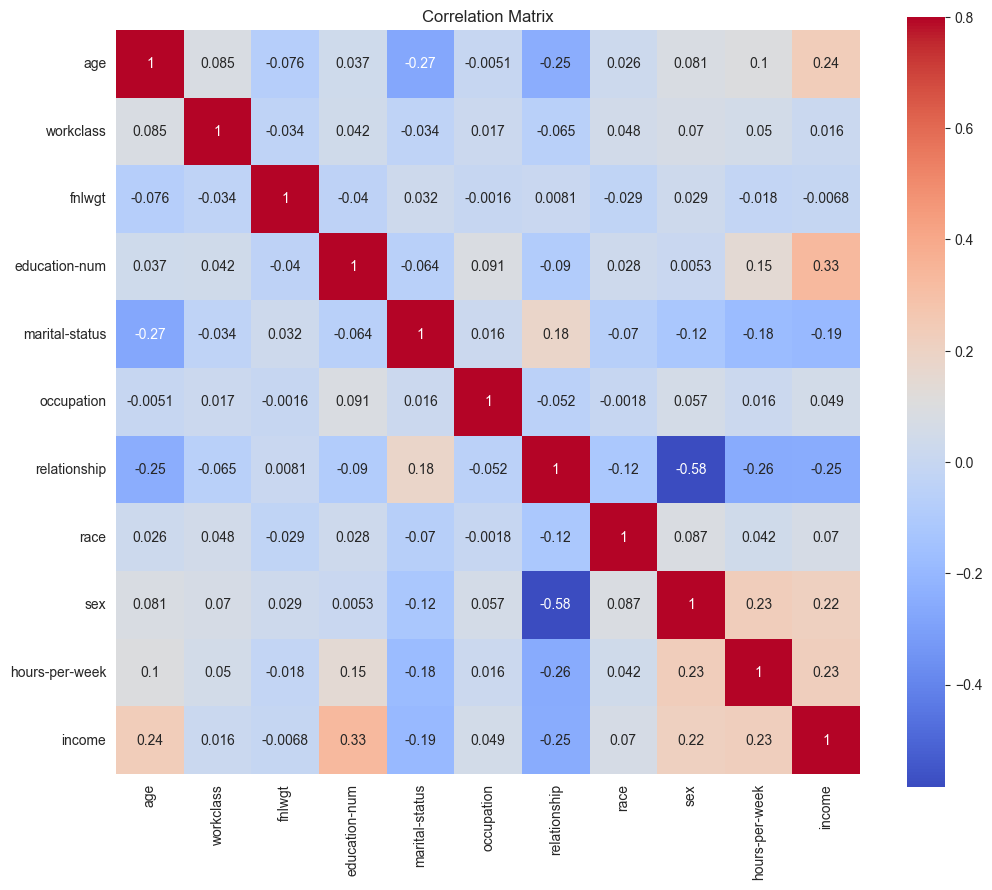

In [120]:
import seaborn as sns

# Visualize correlation matrix
correlation = df_clean.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, vmax=0.8, square=True, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: >

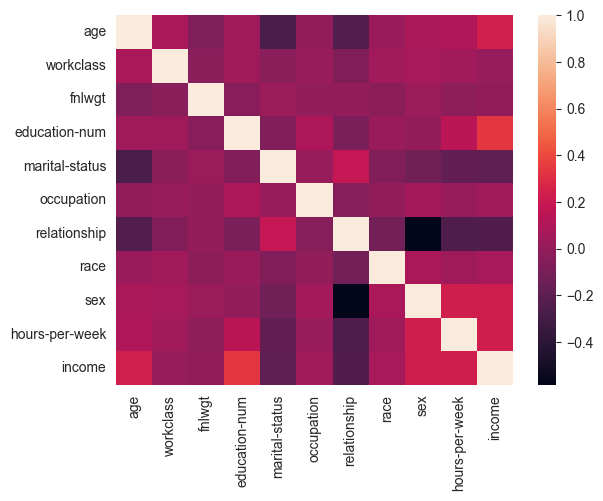

In [121]:
# Heatmap

sns.heatmap(df_clean.corr())

In [122]:
# Before PCA
x = df_clean.drop('income', axis=1)  # Features
y = df_clean['income']  # Target variable (income)

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Random Forest Classifier before PCA

In [124]:
rnd_forest_before_pca = RandomForestClassifier()

In [125]:
rnd_forest_before_pca.fit(x_train, y_train)

RandomForestClassifier()

In [126]:
rnd_forest_pred_before_pca = rnd_forest_before_pca.predict(x_test)

In [127]:
rf_accuracy_before_pca = accuracy_score(y_test, rnd_forest_pred_before_pca)
rf_report_before_pca = classification_report(y_test, rnd_forest_pred_before_pca)

In [128]:
print("Random Forest Classifier Accuracy before PCA:", rf_accuracy_before_pca)

Random Forest Classifier Accuracy before PCA: 0.8195758564437194


In [129]:
print("Random Forest Classifier Report before PCA:\n", rf_report_before_pca)

Random Forest Classifier Report before PCA:
               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      6931
         1.0       0.66      0.56      0.61      2264

    accuracy                           0.82      9195
   macro avg       0.76      0.73      0.74      9195
weighted avg       0.81      0.82      0.81      9195


AUC - ROC

In [130]:
from sklearn.metrics import roc_auc_score

rnd_forest_pred_prob = rnd_forest_before_pca.predict_proba(x_test)

# Compute the ROC AUC score for each class separately
rnd_forest_auc_roc = roc_auc_score(y_test, rnd_forest_pred_prob[:, 1], average='macro')

print("Random Forest Classifier Metrics before PCA:")
print("Accuracy:", rf_accuracy_before_pca)
print("Classification Report:\n", rf_report_before_pca)
print("AUC-ROC Score:", rnd_forest_auc_roc)

Random Forest Classifier Metrics before PCA:
Accuracy: 0.8195758564437194
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      6931
         1.0       0.66      0.56      0.61      2264

    accuracy                           0.82      9195
   macro avg       0.76      0.73      0.74      9195
weighted avg       0.81      0.82      0.81      9195

AUC-ROC Score: 0.8691393852987015


<Figure size 1000x600 with 0 Axes>

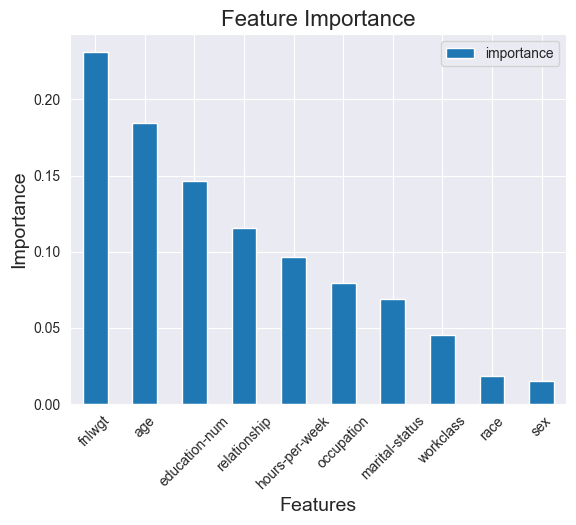

In [131]:
import matplotlib.pyplot as plt

# Visualize feature importance
feature_importances = pd.DataFrame(rnd_forest_before_pca.feature_importances_, index=x_train.columns, columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()

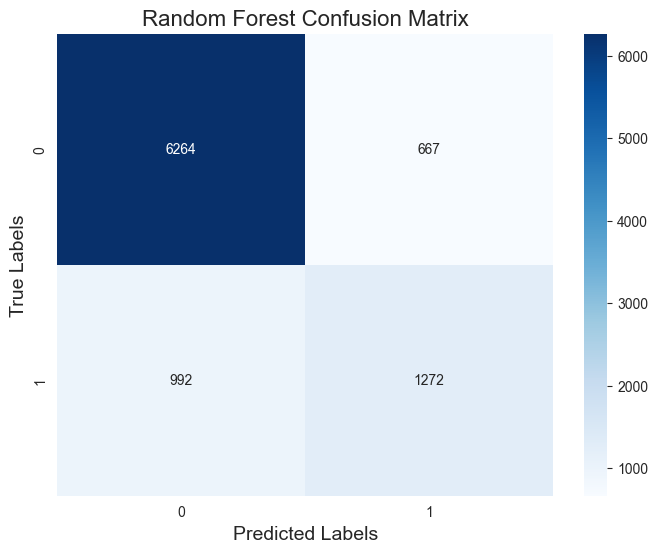

In [132]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Random Forest Confusion Matrix
# Random Forest Confusion Matrix
rnd_forest_pred_before_pca = rnd_forest_before_pca.predict(x_test)
rf_cm = confusion_matrix(y_test, rnd_forest_pred_before_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

# Naive Bayes Classifier before PCA

In [133]:
naive_bayes_before_pca = GaussianNB()

In [134]:
naive_bayes_before_pca.fit(x_train, y_train)

GaussianNB()

In [135]:
nb_pred_before_pca = naive_bayes_before_pca.predict(x_test)

In [136]:
nb_accuracy_before_pca = accuracy_score(y_test, nb_pred_before_pca)
nb_report_before_pca = classification_report(y_test, nb_pred_before_pca)

In [137]:
print("Naive Bayes Classifier Accuracy before PCA:", nb_accuracy_before_pca)

Naive Bayes Classifier Accuracy before PCA: 0.7828167482327352


In [138]:
print("Naive Bayes Classifier Report before PCA:\n", nb_report_before_pca)

Naive Bayes Classifier Report before PCA:
               precision    recall  f1-score   support

         0.0       0.79      0.96      0.87      6931
         1.0       0.67      0.23      0.35      2264

    accuracy                           0.78      9195
   macro avg       0.73      0.60      0.61      9195
weighted avg       0.76      0.78      0.74      9195


AUC - ROC

In [139]:
from sklearn.metrics import roc_auc_score

# Compute the probabilities for each class
naive_bayes_pred_prob_before_pca = naive_bayes_before_pca.predict_proba(x_test)

# Compute the ROC AUC score using the OvR strategy
naive_bayes_auc_roc_before_pca = roc_auc_score(y_test, naive_bayes_pred_prob_before_pca[:, 1], average='macro')

print("Naive Bayes Classifier Metrics before PCA:")
print("Accuracy:", nb_accuracy_before_pca)
print("Classification Report:\n", nb_report_before_pca)
print("AUC-ROC Score:", naive_bayes_auc_roc_before_pca)

Naive Bayes Classifier Metrics before PCA:
Accuracy: 0.7828167482327352
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.96      0.87      6931
         1.0       0.67      0.23      0.35      2264

    accuracy                           0.78      9195
   macro avg       0.73      0.60      0.61      9195
weighted avg       0.76      0.78      0.74      9195

AUC-ROC Score: 0.8033201323699077


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# 
# # Get the class means and variances from the Naive Bayes classifier
# class_means = naive_bayes_before_pca.theta_
# class_variances = naive_bayes_before_pca.sigma_
# 
# # Calculate the absolute difference between class means
# feature_importance = np.abs(class_means[0] - class_means[1])
# 
# # Create a DataFrame with feature names and importance scores
# feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
# 
# # Sort the DataFrame by importance scores in descending order
# feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
# 
# # Plot the feature importance
# plt.figure(figsize=(10, 6))
# plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='steelblue')
# plt.title('Naive Bayes Feature Importance', fontsize=16)
# plt.xlabel('Features', fontsize=14)
# plt.ylabel('Importance Score', fontsize=14)
# plt.xticks(rotation=45)
# plt.show()

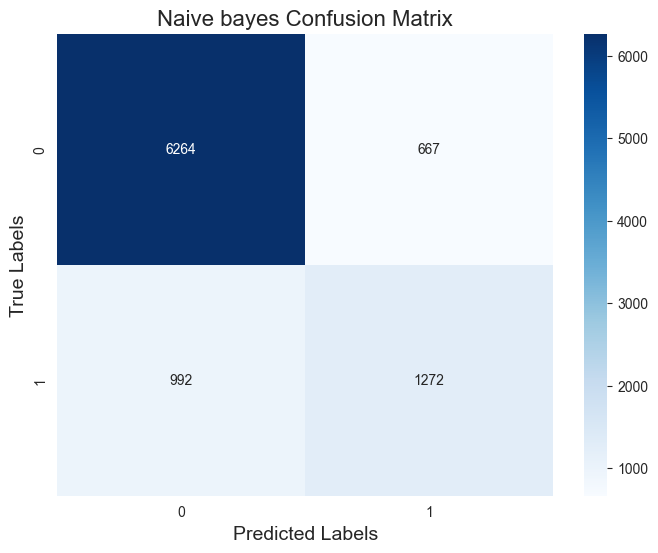

In [143]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Naive Bayes Confusion Matrix
naive_bayes_pred_before_pca = naive_bayes_before_pca.predict(x_test)
nb_cm = confusion_matrix(y_test, naive_bayes_pred_before_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Naive bayes Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

## AUC - ROC Graph

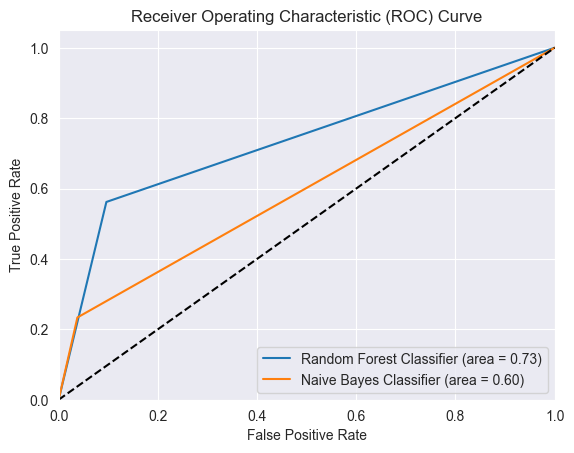

In [144]:
from sklearn.metrics import roc_curve, auc

# Random Forest Classifier
rf_fpr, rf_tpr, _ = roc_curve(y_test, rnd_forest_pred_before_pca)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Naive Bayes Classifier
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_pred_before_pca)
nb_roc_auc = auc(nb_fpr, nb_tpr)

# Plot ROC curves
import matplotlib.pyplot as plt
plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes Classifier (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Principal Component Analysis

In [146]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(x_train)  # Fit PCA to training data
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
pca = PCA(n_components=num_components)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

Variance Ratio

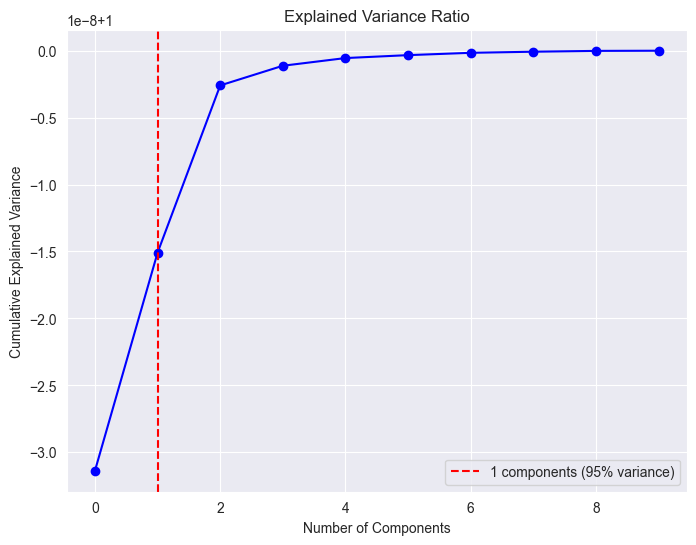

In [147]:
import matplotlib.pyplot as plt

# Visualize explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.axvline(x=num_components, color='r', linestyle='--', label=f'{num_components} components (95% variance)')
plt.legend()
plt.grid(True)
plt.show()

# Random Forest Classifier after PCA

In [148]:
# Random Forest after PCA
rnd_forest_after_pca = RandomForestClassifier()
rnd_forest_after_pca.fit(x_train_pca, y_train)

RandomForestClassifier()

In [149]:
rnd_forest_pred_after_pca = rnd_forest_after_pca.predict(x_test_pca)

In [150]:
rf_accuracy_after_pca = accuracy_score(y_test, rnd_forest_pred_after_pca)
rf_report_after_pca = classification_report(y_test, rnd_forest_pred_after_pca)

In [151]:
print("Random Forest Classifier Accuracy after PCA:", rf_accuracy_after_pca)

Random Forest Classifier Accuracy after PCA: 0.6902664491571506


In [152]:
print("Random Forest Classifier Report after PCA:\n", rf_report_after_pca)

Random Forest Classifier Report after PCA:
               precision    recall  f1-score   support

         0.0       0.79      0.81      0.80      6931
         1.0       0.36      0.33      0.35      2264

    accuracy                           0.69      9195
   macro avg       0.57      0.57      0.57      9195
weighted avg       0.68      0.69      0.69      9195


In [156]:
# from sklearn.metrics import roc_auc_score
# 
# rnd_forest_pred_prob = rnd_forest_after_pca.predict_proba(x_test)
# 
# # Compute the ROC AUC score for each class separately
# rnd_forest_auc_roc = roc_auc_score(y_test, rnd_forest_pred_prob[:, 1], average='macro')
# 
# print("Random Forest Classifier Metrics before PCA:")
# print("Accuracy:", rf_accuracy_after_pca)
# print("Classification Report:\n", rf_report_after_pca)
# print("AUC-ROC Score:", rnd_forest_auc_roc)

from sklearn.metrics import roc_auc_score

# Transform test data using the PCA model
x_test_pca = pca.transform(x_test)

# Make predictions on the transformed test data
rnd_forest_pred_prob = rnd_forest_after_pca.predict_proba(x_test_pca)

# Compute the ROC AUC score for each class separately
rnd_forest_auc_roc = roc_auc_score(y_test, rnd_forest_pred_prob[:, 1], average='macro')

print("Random Forest Classifier Metrics after PCA:")
print("AUC-ROC Score:", rnd_forest_auc_roc)


Random Forest Classifier Metrics after PCA:
AUC-ROC Score: 0.6012366407796589


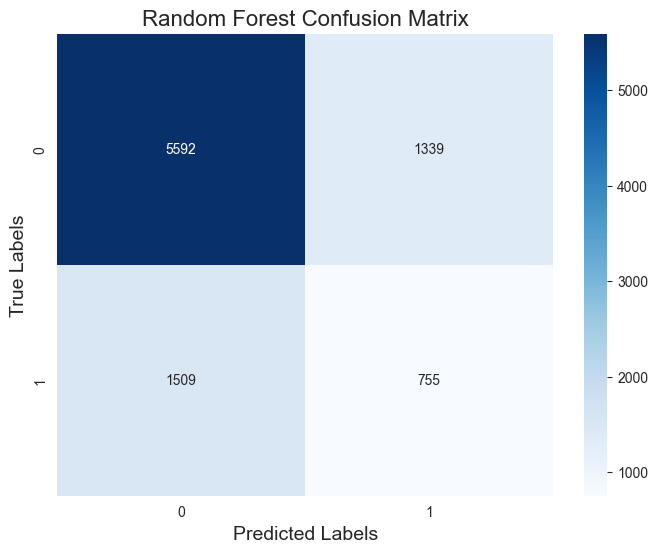

In [162]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Transform test data using the PCA model
x_test_pca = pca.transform(x_test)

# Random Forest Confusion Matrix
rnd_forest_pred_after_pca = rnd_forest_after_pca.predict(x_test_pca)
rf_cm = confusion_matrix(y_test, rnd_forest_pred_after_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

## Naive Bayes Classifier after PCA

In [163]:
naive_bayes_after_pca = GaussianNB()
naive_bayes_after_pca.fit(x_train_pca, y_train)

GaussianNB()

In [164]:
nb_pred_after_pca = naive_bayes_after_pca.predict(x_test_pca)

In [165]:
nb_accuracy_after_pca = accuracy_score(y_test, nb_pred_after_pca)
nb_report_after_pca = classification_report(y_test, nb_pred_after_pca)

D:\IIT Docs\2nd Year\Semester 2\CM 2604 - Machine Learning\CW\ML_CW\ML_CourseWork\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\IIT Docs\2nd Year\Semester 2\CM 2604 - Machine Learning\CW\ML_CW\ML_CourseWork\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\IIT Docs\2nd Year\Semester 2\CM 2604 - Machine Learning\CW\ML_CW\ML_CourseWork\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no

In [166]:
print("Naive Bayes Classifier Accuracy before PCA:", nb_accuracy_after_pca)

Naive Bayes Classifier Accuracy before PCA: 0.7537792278412181


In [167]:
print("Naive Bayes Classifier Report before PCA:\n", nb_report_after_pca)

Naive Bayes Classifier Report before PCA:
               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      6931
         1.0       0.00      0.00      0.00      2264

    accuracy                           0.75      9195
   macro avg       0.38      0.50      0.43      9195
weighted avg       0.57      0.75      0.65      9195


In [168]:
from sklearn.metrics import roc_auc_score

# Compute the probabilities for each class
naive_bayes_pred_prob_after_pca = naive_bayes_before_pca.predict_proba(x_test)

# Compute the ROC AUC score using the OvR strategy
naive_bayes_auc_roc_after_pca = roc_auc_score(y_test, naive_bayes_pred_prob_after_pca[:, 1], average='macro')

print("Naive Bayes Classifier Metrics before PCA:")
print("Accuracy:", nb_accuracy_after_pca)
print("Classification Report:\n", nb_report_after_pca)
print("AUC-ROC Score:", naive_bayes_auc_roc_after_pca)

Naive Bayes Classifier Metrics before PCA:
Accuracy: 0.7537792278412181
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      6931
         1.0       0.00      0.00      0.00      2264

    accuracy                           0.75      9195
   macro avg       0.38      0.50      0.43      9195
weighted avg       0.57      0.75      0.65      9195

AUC-ROC Score: 0.8033201323699077


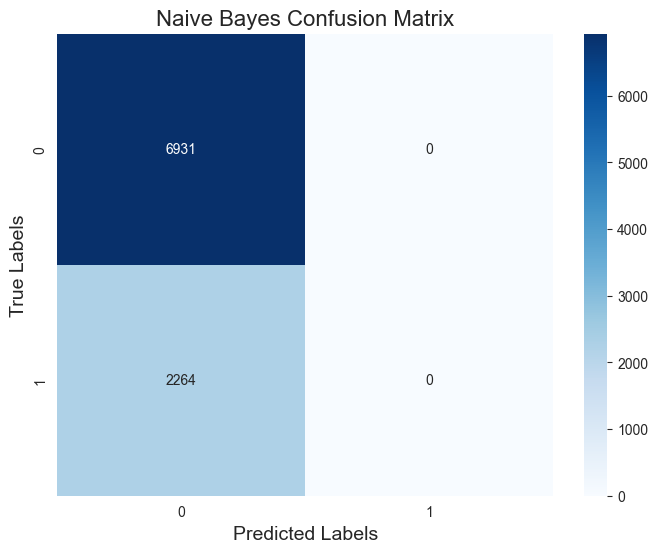

In [170]:
# Naive Bayes Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_pred_after_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

## AUC - ROC Curve after PCA

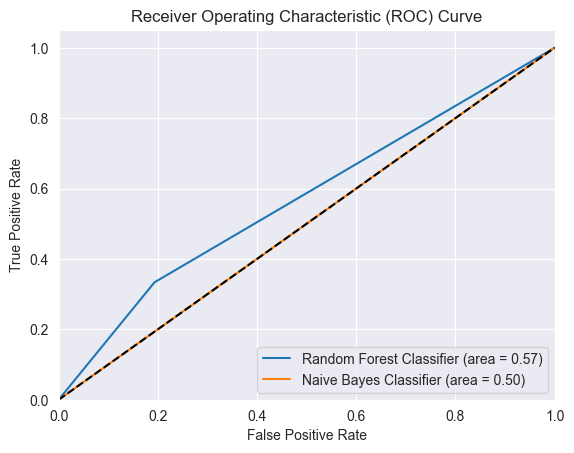

In [169]:
from sklearn.metrics import roc_curve, auc

# Random Forest Classifier
rf_fpr, rf_tpr, _ = roc_curve(y_test, rnd_forest_pred_after_pca)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Naive Bayes Classifier
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_pred_after_pca)
nb_roc_auc = auc(nb_fpr, nb_tpr)

# Plot ROC curves
import matplotlib.pyplot as plt
plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes Classifier (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Variance Ratio

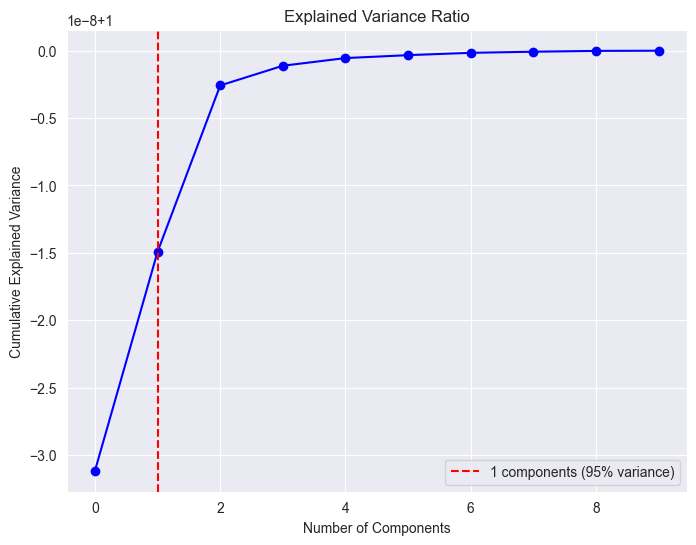

In [514]:
import matplotlib.pyplot as plt

# Visualize explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.axvline(x=num_components, color='r', linestyle='--', label=f'{num_components} components (95% variance)')
plt.legend()
plt.grid(True)
plt.show()